## Objective

Predict the percentage of an student based on the no. of study hours.
- a simple linear regression task as it involves just 2 variables.
- using [data](https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)

### Step 1: Import packages and classes

In [1]:
import pandas as pd
#for dealing with array
import numpy as np
#for linear regression model
from sklearn.linear_model import LinearRegression
#for plot
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### Step 2: Loading data

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

#df = pd.read_csv("student_scores - student_scores.csv")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###### Exploratory Data Analysis

In [3]:
print('Shape of the given data: ',df.shape)

Shape of the given data:  (25, 2)


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null or na  in the data 

In [5]:
print('Summary of the given data')
df.describe()

Summary of the given data


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

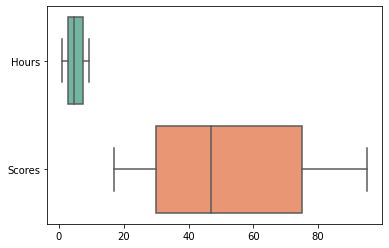

In [7]:
#Distrubution of univariate to see if there is any outlier
sns.boxplot(data=df, orient="h", palette="Set2")

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

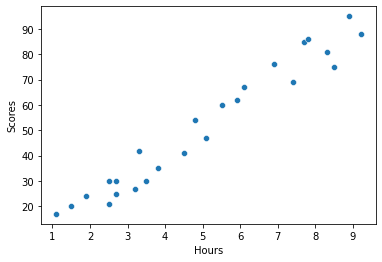

In [8]:
# Plotting the distribution of scores
sns.scatterplot(x= 'Hours',y='Scores',data = df)

From the graph above, we can clearly see that there is a *positive linear relation between the number of hours studied and percentage of score.*

### Remove Outliers

In [9]:
def outlier_detection(df):
    ### Written by: Sujay Rittikar
    # Detecting the Null or NaN values and remo ving them first
    # to ensure that the numerical columns can be detected correctly.
    r = []
    for col in df.columns:
        for i in df.index:
            if df.loc[i, col]=='Null' or df.loc[i, col] == np.nan:
                r.append(i)
    df = df.drop(list(set(r)))
    df = df.reset_index()
    df = df.drop('index', axis=1)
    
    # Finding out the columns having numerical values.
    num_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col])
                num_cols.append(col)
            except ValueError:
                pass
          
    # Removing the rows having values which can be called outliers
    # on the basis of their z-scores of >3 or <-3
    count = 0
    t = []
    for i in num_cols:
        z = np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index', axis=1)
    print(count)
    return df

In [10]:
df = outlier_detection(df)

0


### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Training the Algorithm


We have split our data into training and testing sets, and now is finally the time to train our algorithm.

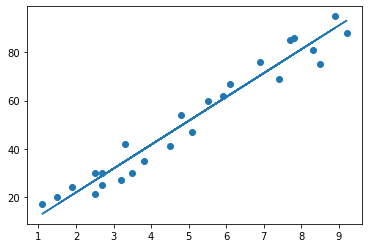

In [13]:
model = LinearRegression().fit(X_train, y_train)

# Plotting the regression line
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

Line of regression is given by y= 9.91 x + 2.01816


Prediction y given by

In [14]:
# Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores
Resid = y_pred - y_test
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Tested_data': X_test.tolist(), 'Actual': y_test, 'Predicted': y_pred, 'Residual': Resid })  
df1

,Tested_data,Actual,Predicted,Residual
0,[1.5],20,16.884145,-3.115855
1,[3.2],27,33.732261,6.732261
2,[7.4],69,75.357018,6.357018
3,[2.5],30,26.794801,-3.205199
4,[5.9],62,60.491033,-1.508967


In [15]:
# Predicted score if a student studies for 9.25 hrs/ day:
hours = 9.25
own_pred = model.intercept_ + model.coef_ * 9.25
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = [93.69173249]


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [16]:
r_sq = model.score(X_train, y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9515510725211552


In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


#### OLS Model

In [18]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [19]:
ols_model = smf.ols('Scores ~ Hours',data=df).fit()

In [20]:
df['pred_ols'] = ols_model.predict(df['Hours'])

In [27]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 11 May 2021   Prob (F-statistic):           9.13e-17
Time:                        21:00:09   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

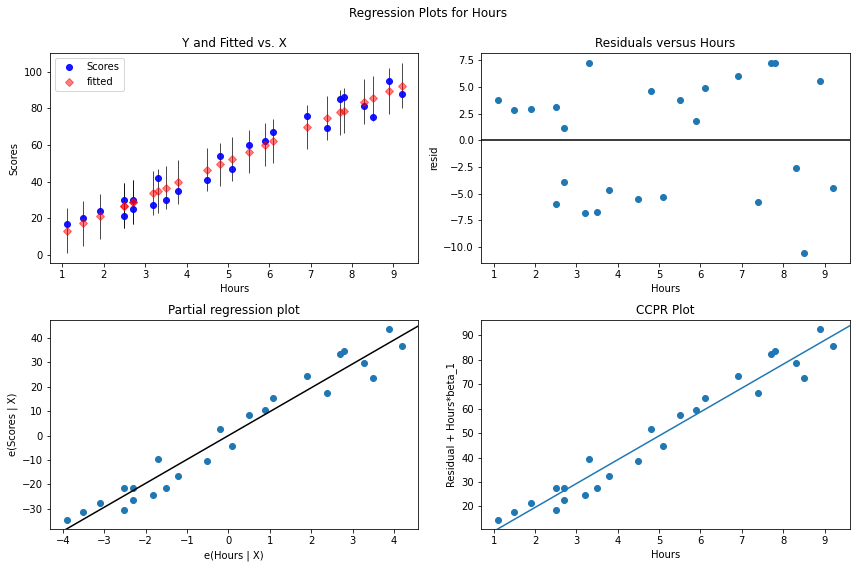

In [22]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(ols_model, 'Hours', fig=fig)

### Training the KNN Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
knn.score(X_train, y_train)

0.25

In [26]:
knn.score(X_test, y_test)

0.0